In [1]:
import numpy as np
D = np.loadtxt("plink.mibs")

In [3]:
!/home/shussain/plink/plink-1.9/plink --bfile /home/shussain/popviz/genomic_data/hgdp_QC_IMP --distance 

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3

  plink <input flag(s)...> [command flag(s)...] [other flag(s)...]
  plink --help [flag name(s)...]

Commands include --make-bed, --recode, --flip-scan, --merge-list,
--write-snplist, --list-duplicate-vars, --freqx, --missing, --test-mishap,
--hardy, --mendel, --ibc, --impute-sex, --indep-pairphase, --r2, --show-tags,
--blocks, --distance, --genome, --homozyg, --make-rel, --make-grm-gz,
--rel-cutoff, --cluster, --pca, --neighbour, --ibs-test, --regress-distance,
--model, --bd, --gxe, --logistic, --dosage, --lasso, --test-missing,
--make-perm-pheno, --tdt, --qfam, --annotate, --clump, --gene-report,
--meta-analysis, --epistasis, --fast-epistasis, and --score.

"plink --help | more" describes all functions (warning: long).


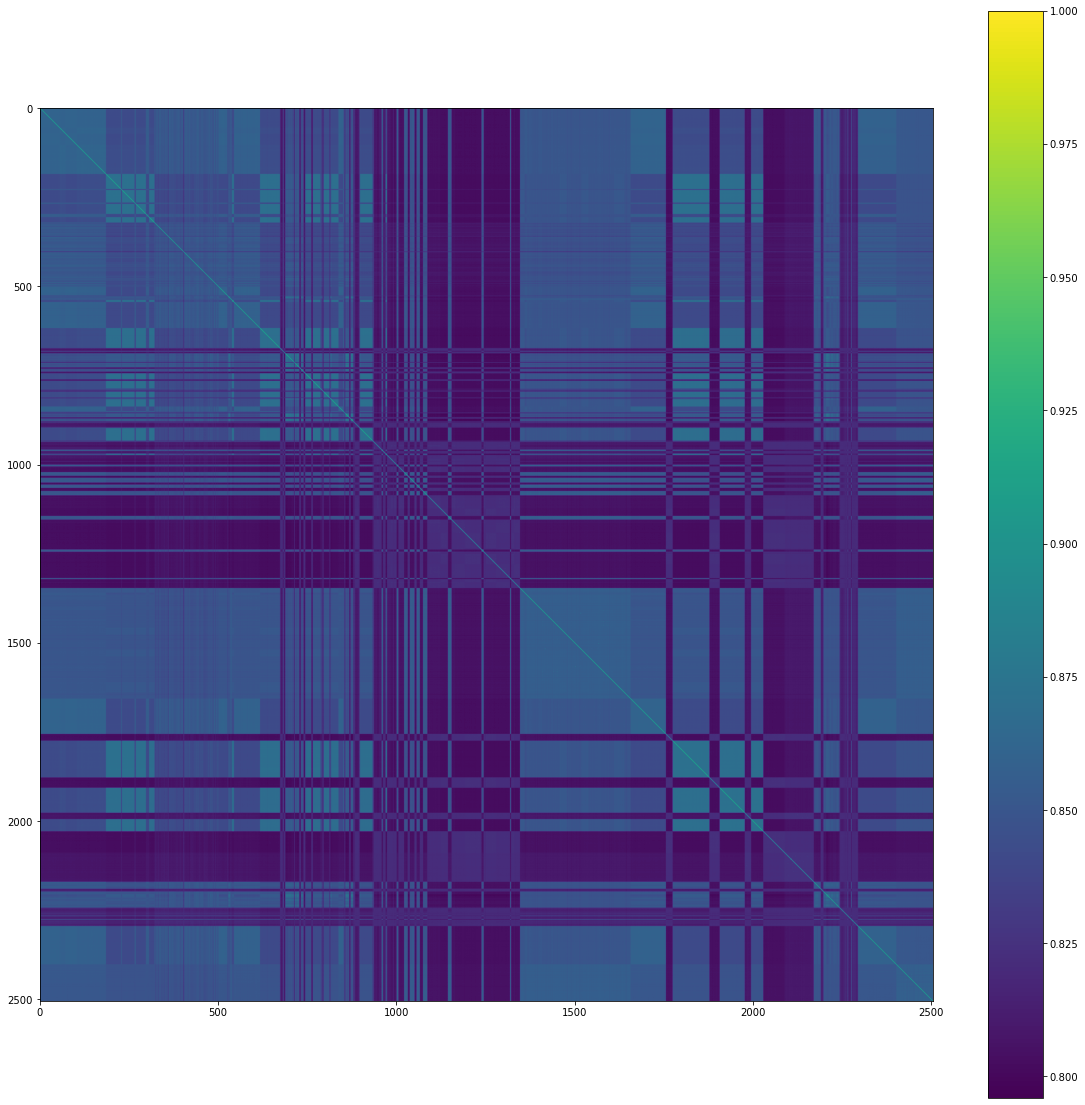

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
plt.imshow(D)
plt.colorbar()


In [62]:
import phate

ph = phate.PHATE(knn_dist='precomputed')
X = ph.fit_transform(1-D)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 2504 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.61 seconds.
  Calculated graph and diffusion operator in 0.79 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.57 seconds.
    Calculating KMeans...
    Calculated KMeans in 22.32 seconds.
  Calculated landmark operator in 25.41 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 6.24 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 11.96 seconds.
Calculated PHATE in 45.48 seconds.


In [56]:
1-D)

array([[      0.      , 1650947.354532, 1636635.191016, ...,
        1769576.377086, 1764563.547768, 1784995.887696],
       [1650947.354532,       0.      , 1668283.88538 , ...,
        1783698.029274, 1780983.24285 , 1781161.84722 ],
       [1636635.191016, 1668283.88538 ,       0.      , ...,
        1770755.165928, 1768850.052648, 1775089.29864 ],
       ...,
       [1769576.377086, 1783698.029274, 1770755.165928, ...,
              0.      , 1662794.777742, 1682286.467988],
       [1764563.547768, 1780983.24285 , 1768850.052648, ...,
        1662794.777742,       0.      , 1673391.970362],
       [1784995.887696, 1781161.84722 , 1775089.29864 , ...,
        1682286.467988, 1673391.970362,       0.      ]])

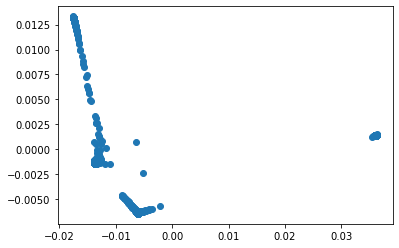

In [63]:
plt.scatter(X[:, 0], X[:, 1])

In [44]:
import pandas as pd
pops = pd.read_csv("/home/shussain/popviz/experiments/euclidean/pops_1kG.csv")
pops

,sample,pop,super_population,in phase 3
0,HG00096,GBR,NaN,NaN
1,HG00097,GBR,NaN,NaN
2,HG00099,GBR,NaN,NaN
3,HG00100,GBR,NaN,NaN
4,HG00101,GBR,NaN,NaN
...,...,...,...,...
2499,NA21137,GIH,NaN,NaN
2500,NA21141,GIH,NaN,NaN
2501,NA21142,GIH,NaN,NaN
2502,NA21143,GIH,NaN,NaN


In [51]:
ibs = pd.read_csv("plink.genome", sep='\s+')
ibs

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,IBS0,IBS1,IBS2,HOMHOM,HETHET
0,HG00096,HG00096,HG00097,HG00097,UN,NaN,0.8243,0.0,0.1757,0.1757,-1,0.861346,0.9955,2.1625,367030,2567836,8972092,1637.0,3540.0
1,HG00096,HG00096,HG00099,HG00099,UN,NaN,0.8248,0.0,0.1752,0.1752,-1,0.862548,0.9997,2.2193,355674,2561934,8989350,1605.0,3562.0
2,HG00096,HG00096,HG00100,HG00100,UN,NaN,0.8265,0.0,0.1735,0.1735,-1,0.861162,0.9924,2.1503,366069,2574137,8966752,1643.0,3533.0
3,HG00096,HG00096,HG00101,HG00101,UN,NaN,0.8281,0.0,0.1719,0.1719,-1,0.861612,0.5587,2.0087,360150,2575271,8971537,1717.0,3449.0
4,HG00096,HG00096,HG00102,HG00102,UN,NaN,0.8249,0.0,0.1751,0.1751,-1,0.861596,0.9678,2.1133,364067,2567797,8975094,1660.0,3508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133751,NA21141,NA21141,NA21143,NA21143,UN,NaN,0.8269,0.0,0.1731,0.1731,-1,0.859564,0.8066,2.0519,379912,2584497,8942549,1695.0,3478.0
3133752,NA21141,NA21141,NA21144,NA21144,UN,NaN,0.8311,0.0,0.1689,0.1689,-1,0.857232,0.7058,2.0323,395463,2608941,8902554,1704.0,3463.0
3133753,NA21142,NA21142,NA21143,NA21143,UN,NaN,0.8313,0.0,0.1687,0.1687,-1,0.860351,0.9744,2.1197,367660,2590263,8949035,1654.0,3506.0
3133754,NA21142,NA21142,NA21144,NA21144,UN,NaN,0.8313,0.0,0.1687,0.1687,-1,0.858714,0.5819,2.0123,382112,2600339,8924507,1713.0,3447.0


In [53]:
(ibs["IBS0"] + ibs["IBS1"] + ibs["IBS2"]).unique()

array([11906958])

(array([9.33201e+05, 3.56643e+05, 1.48625e+05, 6.09802e+05, 9.27566e+05,
        1.56667e+05, 1.23700e+03, 9.00000e+00, 2.00000e+00, 4.00000e+00]),
 array([ 9477831.405378 ,  9632428.9666584,  9787026.5279388,
         9941624.0892192, 10096221.6504996, 10250819.21178  ,
        10405416.7730604, 10560014.3343408, 10714611.8956212,
        10869209.4569016, 11023807.018182 ]),
 <BarContainer object of 10 artists>)

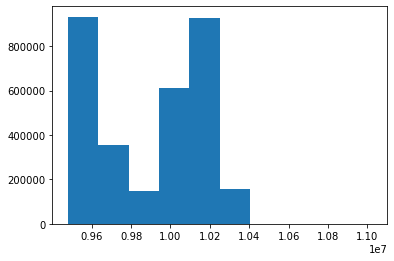

In [55]:
plt.hist(ibs["DST"]*11906958)

In [60]:
import seaborn as sns
df = {
    "phate1": X[:, 0],
    "phate2": X[:, 1],
    "pops": pops["pop"]
}

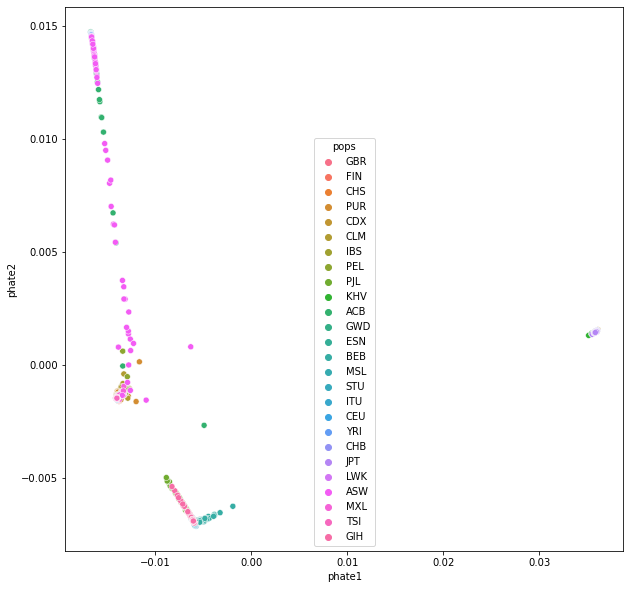

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

sns.scatterplot(data=df, x="phate1", y="phate2", hue="pops")
plt.savefig("phate_ibs.jpeg")

In [34]:
!pip uninstall s_gd2 -y

Found existing installation: s-gd2 1.8
Uninstalling s-gd2-1.8:
  Successfully uninstalled s-gd2-1.8


In [35]:
!/home/shussain/miniconda3/bin/pip install s_gd2

  Using cached s_gd2-1.8-cp37-cp37m-manylinux2010_x86_64.whl (416 kB)


In [18]:
import pandas as pd

frq = pd.read_csv('plink.frq', sep='\s+')
frq

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,rs575272151,G,C,0.08806,5008
1,1,rs544419019,G,C,0.08806,5008
2,1,rs540538026,A,G,0.02676,5008
3,1,rs62635286,G,T,0.09704,5008
4,1,rs200579949,G,A,0.09704,5008
...,...,...,...,...,...,...
11906953,22,rs8142977,T,C,0.01118,5008
11906954,22,rs573137567,T,G,0.02336,5008
11906955,22,rs561893765,A,C,0.02995,5008
11906956,22,rs202228854,T,C,0.12680,5008


In [21]:
frqx = pd.read_csv('plink.frqx', sep='\s+')
frqx

,CHR,SNP,A1,A2,C(HOM_A1),C(HET),C(HOM_A2),C(HAP_A1),C(HAP_A2),C(MISSING)
0,1,rs575272151,G,C,19,403,2082,0,0,0
1,1,rs544419019,G,C,19,403,2082,0,0,0
2,1,rs540538026,A,G,0,134,2370,0,0,0
3,1,rs62635286,G,T,36,414,2054,0,0,0
4,1,rs200579949,G,A,36,414,2054,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11906953,22,rs8142977,T,C,0,56,2448,0,0,0
11906954,22,rs573137567,T,G,5,107,2392,0,0,0
11906955,22,rs561893765,A,C,6,138,2360,0,0,0
11906956,22,rs202228854,T,C,89,457,1958,0,0,0


In [20]:
!head plink.frqx -n 10

CHR	SNP	A1	A2	C(HOM A1)	C(HET)	C(HOM A2)	C(HAP A1)	C(HAP A2)	C(MISSING)
1	rs575272151	G	C	19	403	2082	0	0	0
1	rs544419019	G	C	19	403	2082	0	0	0
1	rs540538026	A	G	0	134	2370	0	0	0
1	rs62635286	G	T	36	414	2054	0	0	0
1	rs200579949	G	A	36	414	2054	0	0	0
1	rs531730856	C	G	16	444	2044	0	0	0
1	rs546169444	T	A	26	428	2050	0	0	0
1	rs531646671	A	T	14	711	1779	0	0	0
1	rs541940975	G	A	14	711	1779	0	0	0
